#  Spotify Dataset: Predict if a track is liked or not liked

  
###  Workflow Stages

 

1. Define the question or problem.

2. Acquire training and test data.

3. Discuss, prepare, clean the data.

4. Analyze, identify patterns, and explore the data.

5. Model, predict, and solve the problem.

6. Visualize, report, and present the steps for problem solving and the final solution.

7. Provide or submit the results.

  
  

###  Goals

  
 
To infer from a training sample set that a track is going to be likeable, our model must determine based on a given test dataset, whether these tracks in the test dataset are liked or not. This tracks are labeled so ***this is a supervised learning classification problem*** (binary classification: like/dislike).

**Correlation** The problem can be addressed based on the features available within the training set. Which features within the dataset contribute significantly to our solution goal? Statistically speaking, is there a correlation between a feature and a solution goal? As feature values ​​change, does the solution state change as well, and vice versa? This can be tested for both numerical and categorical features. We may also want to determine the correlation between features other than survival for subsequent goals and workflow stages. Correlating certain features can help create, complete, or correct features.


**Conversion** For the modeling stage, data preparation is required. Depending on the choice of model algorithm, all features may be required to be converted to equivalent numerical values. So, for example, converting categorical text values ​​to numerical values.
  

**Completion** Data preparation may also require us to estimate missing values ​​within a feature. Modeling algorithms can help us to estimate missing values ​​within a feature.

### **Importing Libraries**
In this step, we import the necessary libraries for data analysis, visualization, and modeling.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Load data
spotify_data = pd.read_csv('Spotify Analysis/data_playlist.csv')



## **Exploring the Dataset**

For this EDA we are visualizing the first row, and I am taking a sample just to explore the data, after that we identify the type of data, so I can identify then as continuos or discrete, also we will identify if a variable is  informative to avoid classification process. 

We have the following goals

1) Visualizing the first few rows of the dataset to understand its structure and the type of features present:
2) Understanding the shape or size of this data set
3) Getting an statistical summary
4) Understanding the varible types


In [3]:
#First few rows
# The goal here is to get a quick look at the data.
spotify_data.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1


In [4]:
spotify_data.shape

(750, 14)

In [5]:
spotify_data.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


In [6]:
# Check the types of data for each feature to identify if they are numerical, categorical, or ordinal.
# Knowing the type will guide further steps in preprocessing and feature engineering.
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


### Observations

- ***Total*** are 750 
- ***'label'*** is our ***prediction***, with 1 as likekable  and 0 as Non likekable.
- ***Key*** is a categorical value with numbers from 0 to 11
- ***acoustiness, danceability, energy, instrumentalness, liveness, speechiness, and valence*** are **continous** variables that goes up till 1 
- About **60%** of the tracks are ***likeable***
- ***Mode*** is categorical between 1 or 0 indicates the modality (major or minor) of a track, the type of scale from which its melodic content is      derived. Major is represented by 1 and minor is 0, the tracks in major are 74% of this set. 
- Most of the time signature ranges in 4 (> 75%) 
- Most of the tracks duration ranges in 244236(> 75%) these are miliseconds, that transformed to minutes are about 4 minutes. 
- ***valence*** describing the musical positiveness conveyed by a track. Tracks with high valence sound more ***positive (e.g. happy, cheerful, euphoric)***, while tracks with low valence sound more ***negative (e.g. sad, depressed, angry)***, (> 75%) of the tracks are onto 0.68 

### Variable Insights



| **Variable**        | **Type**        | **Description**                                                                 | **Classification**  |
|---------------------|-----------------|---------------------------------------------------------------------------------|---------------------|
| acousticness        | Continuous      | Attribute that measures how acoustic a song is.                                 | Numerical            |
| danceability        | Continuous      | Measures how suitable a song is for dancing.                                    | Numerical            |
| duration            | Discrete        | Duration of a song in milliseconds.                                             | Numerical            |
| energy              | Continuous      | Measures the perceived intensity and activity of the song.                      | Numerical            |
| instrumentalness     | Continuous      | Indicates the likelihood that a track contains no vocals.                       | Numerical            |
| key                 | Discrete        | Represents the musical key of a song (in semitones).                            | Categorical          |
| liveness            | Continuous      | Detects the presence of an audience in the recording.                           | Numerical            |
| loudness            | Continuous      | Measures the average volume of the song (in decibels).                          | Numerical            |
| mode                | Binary          | Indicates if a track is in major mode (1) or minor mode (0).                    | Categorical          |
| speechiness         | Continuous      | Measures the amount of spoken words in the track.                               | Numerical            |
| tempo               | Continuous      | Measures the tempo of the song in beats per minute (BPM).                       | Numerical            |
| time_signature      | Ordinal         | Represents the time signature of the song (e.g., 4/4).                          | Categorical          |
| valence             | Continuous      | Measures the musical positiveness of a track.                                   | Numerical            |
| label               | Binary          | Target variable indicating whether the song is liked or disliked.               | Categorical          |

##  **Visualizing the Data**

### Numerical Variables

#### **Heatmap**

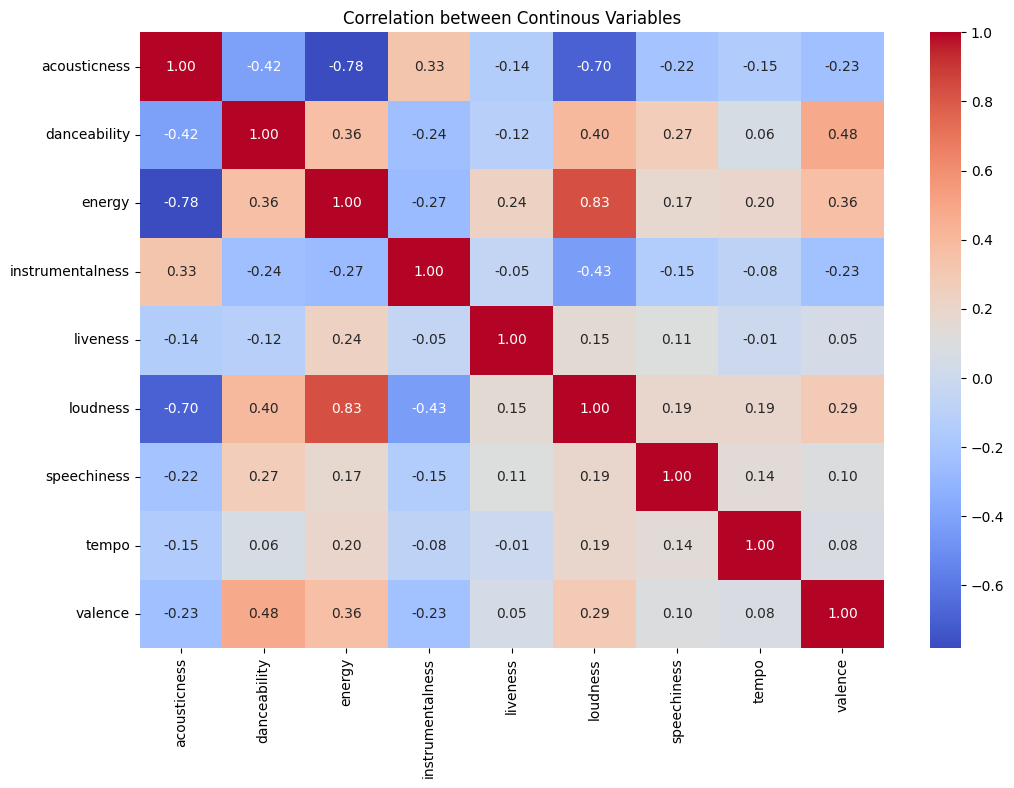

In [7]:
# Heatmap correlation just for continues variables
continous_columns = spotify_data.select_dtypes(include=['float64']).columns                                     
plt.figure(figsize=(12,8))
sns.heatmap(spotify_data[continous_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between Continous Variables")
plt.show()

Key Relationships:


The correlation matrix gives a clear picture of how different musical features interact. Stronger correlations, like between energy and loudness, align with what you'd expect for energetic music, while negative relationships like instrumentalness with danceability and energy suggest that instrumental songs tend to be more mellow and less rhythmic. These insights can help in understanding user preferences and improving song recommendations.

-   **Energy and Loudness**  have a moderate positive correlation. This means that more energetic songs tend to be louder, which makes sense because high-energy tracks often have higher volume to emphasize their intensity.
    
-   **Danceability and Valence**  also show a moderate positive correlation. This suggests that happier songs (valence) are generally easier to dance to (danceability). Songs with a positive vibe seem to encourage more physical interaction, like dancing.
    
-   **Instrumentalness**  has a negative correlation with both Danceability and Energy. This suggests that instrumental tracks are typically less danceable and less energetic. Songs without vocals usually focus more on a calm vibe, making them less suited for dancing.
    
-   **Speechiness**  has a slight positive relationship with Valence, which could mean that songs with more spoken words tend to be a bit "happier." But the correlation is low, so it’s not a strong link.
    
-   **Tempo**  shows a weak correlation with most variables, suggesting that the speed of a song doesn’t strongly affect features like danceability, energy, or valence. This implies that other musical elements, beyond just tempo, play a bigger role in how these features are perceived.
    

#### **Violin Plot**

This give us an easier understanding of the data distribution for each numerical variable in the dataset. Scaling ensures that the differences in variable ranges do not distort the visual representation, enabling a more meaningful comparison between the features, since loudness, duration and tempo were on other scale it would show distorted. So I am using MinMaxScaler for this 

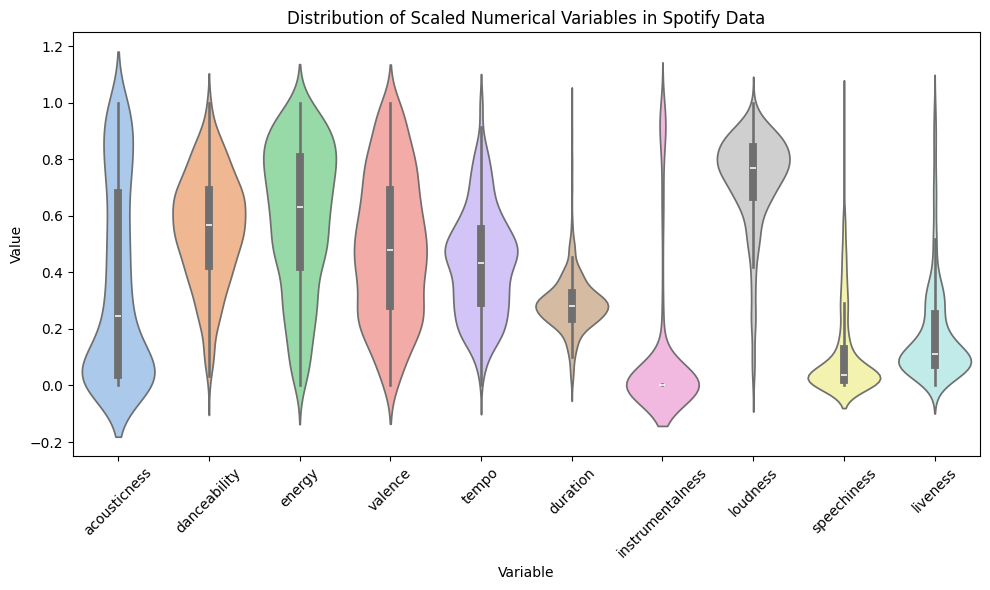

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

numerical_variables = ['acousticness', 'danceability', 'energy', 'valence', 'tempo', 'duration', 
                       'instrumentalness', 'loudness', 'speechiness', 'liveness']

# Create a copy of the original data for scaling in this case after preprocessing
scaled_data = spotify_data[numerical_variables].copy()

# Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_data[numerical_variables] = scaler.fit_transform(scaled_data[numerical_variables])

# Reshape the data using melt for Seaborn
spotify_melted_scaled = scaled_data.melt(var_name='Variable', value_name='Value')

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=spotify_melted_scaled, x='Variable', y='Value', 
               hue='Variable', density_norm='width', inner='box', palette='pastel', legend=False)
plt.title('Distribution of Scaled Numerical Variables in Spotify Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This violin plot shows the distribution of numerical variables from the dataset, after applying scaling to normalize the values between 0 and 1. Each violin represents a specific numerical feature, illustrating both the density and the distribution of the data.

- Acousticness: Most songs have low acoustic values, meaning they are not very acoustic. The distribution is skewed toward the lower range, with very few songs having high acousticness.

- Danceability: The distribution is fairly balanced, with a concentration of values in the mid to high range (0.5-0.7), indicating that many songs are quite danceable.

- Energy: Songs tend to have medium to high energy levels. The distribution is broad, with no sharp peaks, meaning energy levels are spread out across the dataset.

- Valence: This feature, which measures how positive a song sounds, has a relatively even distribution. However, there is a slight skew towards lower values, suggesting that many songs have a less positive tone.

- Tempo: The tempo distribution is quite uniform, with most songs falling in the mid-range of beats per minute (BPM). There is a minor concentration of slower-tempo songs toward the lower end.

- Duration: Most songs in the dataset are between 2.5 and 4 minutes in length (150,000 to 250,000 milliseconds), with a clear peak reflecting this typical song duration.

- Instrumentalness: The data is heavily skewed towards zero, indicating that most songs contain vocals and are not instrumental.

- Loudness: Loudness levels are primarily concentrated around moderate values. There are fewer songs at the extreme ends (either very quiet or very loud).

- Speechiness: This feature, which measures the presence of spoken words in songs, shows that most songs have low speechiness, meaning they contain few spoken words.

- Liveness: The distribution is highly skewed toward low values, indicating that most songs do not have a live audience component or live recording features.

### Categorical Variables


Analyze cardinality (the number of unique categories).
Examine the frequency distribution of each category.

In [135]:
# Percentage of the mode (most common value) in each column
for col in spotify_data.columns:
    if col != 'label':  # Excluding label
        mode_frequency = spotify_data[col].value_counts(normalize=True).values[0] * 100
        if mode_frequency > 50:
            print(f"Column {col}: {mode_frequency:.2f}% of the most common value")

Column mode: 74.13% of the most common value
Column time_signature: 89.47% of the most common value


The variables mode and key should be removed since they are two variables that depend on each other. Time_signature should also be removed since it has little variability.


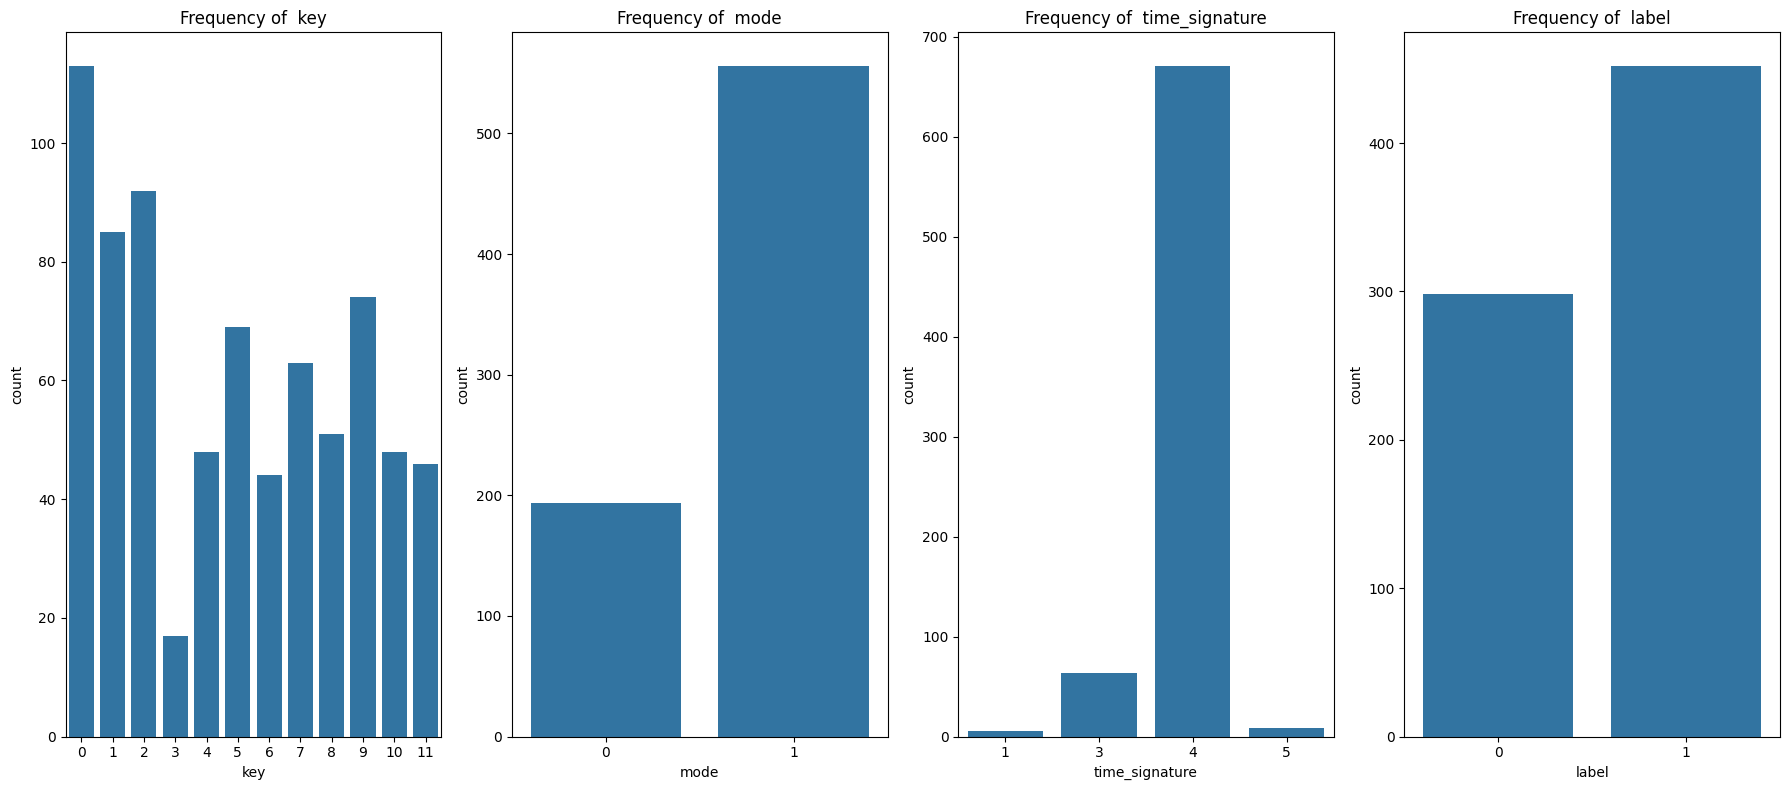

In [136]:
cat_variables = ['key', 'mode', 'time_signature', 'label']
plt.figure(figsize=(18, 8))
for i, variable in enumerate(cat_variables, 1):
    plt.subplot(1, 4, i)
    sns.countplot(x=variable, data=spotify_data)
    plt.title(f'Frequency of  {variable}')
plt.tight_layout()
plt.show()

## **Cleaning and Data Preparation / Feature Engineering**

In [137]:
spotify_data.isnull().sum().to_frame('QTY nulls')

,QTY nulls
acousticness,0
danceability,0
duration,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
mode,0
speechiness,0


After seeing the variability of this categorical variables, delete them would be the best decision

In [138]:
#Delete the categorical values with less variability
spotify_data= spotify_data.drop(columns=['key', 'mode','time_signature'])

### Data preproccesing 


To apply normalization (or standardization), I am using StandardScaler or MinMaxScaler from sklearn.preprocessing.
Since this is a supervised learning case, I will be using Logistic Regression so this is an important step for the model to work properly 

In [139]:
from sklearn.preprocessing import StandardScaler
# Scaling the data
numerical_cols = ['acousticness', 'danceability', 'duration', 'energy', 'instrumentalness',
                  'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
scaler = StandardScaler()
spotify_data[numerical_cols] = scaler.fit_transform(spotify_data[numerical_cols])
# Check the first few rows to verify scaling
print(spotify_data.head())


   acousticness  danceability  duration    energy  instrumentalness  liveness  \
0      1.051530     -0.479513 -1.830645 -0.289129          2.755574 -0.514824   
1     -0.489072      0.683807 -0.199770  0.078268         -0.385931  0.335928   
2     -0.072134      0.195213 -0.059696 -0.549862         -0.385917 -0.430312   
3      0.720345      1.242201 -1.277002 -1.474280          0.422545 -0.109167   
4      1.554221     -0.764526 -0.590027 -0.534060         -0.385265 -0.755964   

   loudness  speechiness     tempo   valence  label  
0 -1.256057    -0.521443 -0.018575 -1.479699      1  
1  0.312609    -0.640895  0.125647  0.353630      1  
2 -0.155012    -0.666697  0.688498 -1.245835      1  
3 -0.495552    -0.535778 -0.368338  1.255678      1  
4  0.073934    -0.610315 -1.043710 -0.874157      1  


Before in the violin plot, we observed the distribution of acousticness highly skewed toward lower values, with most tracks having low acousticness. This skewness can cause issues in logistic regression as the model assumes that features are linearly related to the log-odds of the outcome. Speechiness is also heavily skewed toward the lower values indicating that most tracks contain minimal spoken content.

To approach this,  I applied the PowerTransformer from scikit-learn using the Yeo-Johnson method. This method is particular for handling skewed data, including values that are zero or even negative like spechiness and accoustiness. 
It transforms the features to make them more normally distributed, which is crucial for improving the performance of logistic regression, as the model assumes linear relationships between the features and the target.

In [140]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
spotify_data[['acousticness_yeo', 'speechiness_yeo']] = pt.fit_transform(spotify_data[['acousticness', 'speechiness']])



In simple terms: by normalizing the  skewed data, its helping the logistic regression model work more accurately.

Splitting the data

In [141]:
X_train, X_test, y_train, y_test = train_test_split(
    spotify_data[['acousticness', 'danceability', 'duration', 'energy', 'instrumentalness',  'liveness', 'loudness',  'speechiness', 'tempo', 'valence',]],
    spotify_data['label'],
    test_size=0.4,
    random_state=42)

X_train.shape, X_test.shape

((450, 10), (300, 10))

Also we are going to define afunction that checks for overfitting by comparing the training accuracy and test accuracy of a model. If the difference between the two is too large (typically when training accuracy is much higher than test accuracy), it suggests overfitting.

In [142]:
def check_overfitting(train_accuracy, test_accuracy, threshold_percentage=0.1):
    """
    Function to check for overfitting based on the difference between training and test accuracy.
    The threshold is dynamically set as a percentage of the training accuracy.

    Args:
    - train_accuracy (float): Accuracy of the model on the training data.
    - test_accuracy (float): Accuracy of the model on the test data.
    - threshold_percentage (float): The percentage of training accuracy to use as the threshold for overfitting detection.
                                   Defaults to 0.1 (10%).
    Returns:
    - str: Message indicating whether the model is overfitting or not.
    """
    # Calculate the adaptable threshold based on the percentage of training accuracy
    threshold = train_accuracy * threshold_percentage
    # Calculate the difference between training and test accuracy
    accuracy_diff = train_accuracy - test_accuracy
    # Check if the difference exceeds the adaptable threshold
    if accuracy_diff > threshold:
        return f"Overfitting detected! Training accuracy is significantly higher than test accuracy by {accuracy_diff:.2f}. 🚨"
    else:
        return f"Not overfitting. The model seems to be generalizing well. 😊."

## **Model Training** 

### **Logistic Regression**


For this task, we decided to use Logistic regression as our primary model. The reasons:

**Binary classification problem:** The target variable in this dataset is binary ( 0 or 1)  making logistic regression an ideal choice. Logistic regression is specifically designed for such tasks, where the goal is to predict probabilities of class membership.

 Logistic regression is a relatively simple model that often performs well in situations where the relationship between the features and the outcome is roughly linear. It is computationally efficient and avoids unnecessary complexity, which makes it a good starting point before moving to more complex models.


In [143]:
# Train the Logistic Regression model on the scaled data
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Evaluating the Model's Performance
After training, we use the model to predict the target values and evaluate the performance using key classification metrics:

In [144]:
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'AUC-ROC: {auc}')


Accuracy: 0.8
Precision: 0.8827160493827161
Recall: 0.7771739130434783
F1 Score: 0.8265895953757225
AUC-ROC: 0.8066904047976013


***Metrics Explained:***

- Accuracy: 0.80 – The model predicts correctly 80% of the time.
- Precision: 0.88 – Out of the predicted positive cases, 88% were true positives.
- Recall: 0.77 – The model captures 77% of actual positive cases.
- F1 Score: 0.82 – The harmonic mean of precision and recall.
- AUC-ROC: 0.81 – Indicates strong discriminatory power of the model in distinguishing between classes.

Given the class imbalance in the dataset, we used the class_weight='balanced' parameter in Logistic Regression to adjust for this imbalance and give equal importance to both classes:

In [145]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

This balances the contribution of the minority class during training, ensuring the model doesn't favor the majority class.

#### Performance Evaluation 


In [146]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.66      0.85      0.75       116
           1       0.89      0.73      0.80       184

    accuracy                           0.78       300
   macro avg       0.78      0.79      0.77       300
weighted avg       0.80      0.78      0.78       300

ROC-AUC Score: 0.899597076461769


Understanding this metrics:

- Accuracy (0.78): this model predicts 78% of the cases, it can be improved

- Precision and Recall:
Class 0 (not liked): When the model predicts a song is not liked, it’s correct 66% of the time, It identifies 85% of the actual "not liked" songs, meaning it does well at catching most of the "not liked" songs, though its precision is lower.
Class 1 (liked): When the model predicts a song is liked, it's correct 89% of the time. However, it misses 27% of the actual "liked" songs, indicating room for improvement in correctly identifying liked songs.

- F1-Score:
The F1-score balances precision and recall. For class 1 (liked songs), it’s at 0.80, which is solid but indicates that recall could be improved further.

- ROC-AUC (0.899): 
This is a very good ROC-AUC score, indicating that the model has strong discriminatory power, meaning it’s good at distinguishing between the two classes (liked and not liked songs).'


 The difference in precision and recall between the two classes might suggest a slight imbalance in the dataset, as the model is better at predicting "liked" songs than "not liked" ones. The class 1 (liked) has higher precision but slightly lower recall, meaning the model could be slightly biased towards predicting "liked" songs. If "not liked" songs are more important to detect.

### Tune the decision threshold

By default logistic regression uses 0.5  but lowering it might improve recall at the expense of precision.

In [147]:
threshold = 0.4
y_pred_threshold = (model.predict_proba(X_test)[:, 1] >= threshold).astype(int)
print(classification_report(y_test, y_pred_threshold))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       116
           1       0.88      0.78      0.83       184

    accuracy                           0.80       300
   macro avg       0.79      0.81      0.79       300
weighted avg       0.81      0.80      0.80       300



With the threshold at 0.4:

Recall for Class 1 improved to 78%, indicating the model now catches more "liked" songs, though there is a trade-off in precision.

### Test

In [148]:
# Predictions on the training set with adjusted threshold
y_train_prob = model.predict_proba(X_train)[:, 1]
y_train_pred_threshold = (y_train_prob >= threshold).astype(int)

# Predictions on the test set with adjusted threshold
y_test_prob = model.predict_proba(X_test)[:, 1]
y_test_pred_threshold = (y_test_prob >= threshold).astype(int)

# Evaluate the model on the training set
print("Training Set Performance:")
print(classification_report(y_train, y_train_pred_threshold))
print("Training ROC-AUC Score:", roc_auc_score(y_train, y_train_prob))

# Evaluate the model on the test set
print("\nTest Set Performance:")
print(classification_report(y_test, y_test_pred_threshold))
print("Test ROC-AUC Score:", roc_auc_score(y_test, y_test_prob))

Training Set Performance:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       182
           1       0.84      0.87      0.85       268

    accuracy                           0.82       450
   macro avg       0.82      0.81      0.81       450
weighted avg       0.82      0.82      0.82       450

Training ROC-AUC Score: 0.8935132032146959

Test Set Performance:
              precision    recall  f1-score   support

           0       0.71      0.83      0.76       116
           1       0.88      0.78      0.83       184

    accuracy                           0.80       300
   macro avg       0.79      0.81      0.79       300
weighted avg       0.81      0.80      0.80       300

Test ROC-AUC Score: 0.899597076461769


### Check for overfitting

Using the implemented function to check for overfitting by comparing training accuracy to test accuracy. If the difference exceeds a certain threshold, overfitting is likely

In [149]:
train_acc = 0.8935 
test_acc = 0.8995 

# Using a threshold percentage of 5% of the training accuracy
result = check_overfitting(train_acc, test_acc, threshold_percentage=0.05)
print(result)

Not overfitting. The model seems to be generalizing well. 😊.


### Recursive Feature Elimination (RFE)

To further refine the model, we applied Recursive Feature Elimination (RFE) to select the top 5 most important features

In [150]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', solver='liblinear', C=0.01)
rfe = RFE(model, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print(f'Selected Features: {selected_features}')

Selected Features: Index(['acousticness', 'danceability', 'energy', 'loudness', 'speechiness'], dtype='object')


##### Evaluating Model with Selected Features

In [151]:
# Evaluate the performance of the model with selected features
y_test_pred_rfe = rfe.predict(X_test)
print("Test set performance with selected features:")
print(classification_report(y_test, y_test_pred_rfe))
print("Test ROC-AUC score:", roc_auc_score(y_test, rfe.predict_proba(X_test)[:, 1]))

Test set performance with selected features:
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       116
           1       0.88      0.74      0.81       184

    accuracy                           0.78       300
   macro avg       0.78      0.79      0.78       300
weighted avg       0.80      0.78      0.79       300

Test ROC-AUC score: 0.8995970764617691


The performance with selected features was comparable to the full feature set, but now the model is more efficient with fewer features:

Accuracy: 0.78
ROC-AUC: 0.89 – Still maintaining a strong discriminatory ability.